In [1]:
import ROOT as root
import numpy as np
import random
from timer import Timer

print(np.__version__)

t = Timer()
t.start()

2.0.2


In [2]:
import os
print("PYTHONPATH = ",os.environ.get('PYTHONPATH'))
print("PYTHONPATH = ",os.environ.get('PYTHONPATH'))

PYTHONPATH =  /usr/lib64/python3.9/site-packages:/usr/lib/python3.9/site-packages
PYTHONPATH =  /usr/lib64/python3.9/site-packages:/usr/lib/python3.9/site-packages


In [3]:
fileName = "rootfiles/test31.root"
treeName = "tdata"

f = root.TFile(fileName)
myTree = f.Get(treeName)

myTree.Print()

root.EnableImplicitMT()
d = root.RDataFrame(treeName,fileName)

******************************************************************************
*Tree    :tdata     : Run 31                                                 *
*Entries :   420299 : Total =        53952838 bytes  File  Size =   11113164 *
*        :          : Tree compression factor =   4.86                       *
******************************************************************************
*Br    0 :adc       : adc[16]/I                                              *
*Entries :   420299 : Total  Size=   26976245 bytes  File Size  =    8023674 *
*Baskets :      844 : Basket Size=      32000 bytes  Compression=   3.36     *
*............................................................................*
*Br    1 :tdc       : tdc[16]/I                                              *
*Entries :   420299 : Total  Size=   26976245 bytes  File Size  =    3076598 *
*Baskets :      844 : Basket Size=      32000 bytes  Compression=   8.76     *
*...................................................

In [4]:
root.gInterpreter.ProcessLine('#include "rdfluterplots.h"')

0

In [5]:
fdf = d.Define("trigger","getTrigger(&tdc[0],&adc[0])")

entries = d.Count();
print('{} entries'.format(entries.GetValue()))

triggers = fdf.Filter("trigger==true").Count()
print('{} entries passed trigger'.format(triggers.GetValue()))

fdft = fdf.Filter("trigger==true")

420299 entries
271500 entries passed trigger


In [6]:
fdftt = fdft.Define("tdctl","tdc[0]") \
            .Define("tdctr","tdc[1]") \
            .Define("tdcbl","tdc[2]") \
            .Define("tdcbr","tdc[3]") \
            .Define("adctl","adc[0]") \
            .Define("adctr","adc[1]") \
            .Define("adcbl","adc[2]") \
            .Define("adcbr","adc[3]")

In [7]:
tdctl0 = fdftt.Mean("tdctl").GetValue()
tdctr0 = fdftt.Mean("tdctr").GetValue()
tdcbl0 = fdftt.Mean("tdcbl").GetValue()
tdcbr0 = fdftt.Mean("tdcbr").GetValue()
print(tdctl0,tdctr0,tdcbl0,tdcbr0)
adctl0 = fdftt.Mean("adctl").GetValue()
adctr0 = fdftt.Mean("adctr").GetValue()
adcbl0 = fdftt.Mean("adcbl").GetValue()
adcbr0 = fdftt.Mean("adcbr").GetValue()
print(adctl0,adctr0,adcbl0,adcbr0)
adjadcto=1400.0

1841.5430681399632 1894.866917127072 1893.5799447513812 1898.5062688766113
958.9386040515653 788.4243535911602 972.8073480662983 637.5395138121547


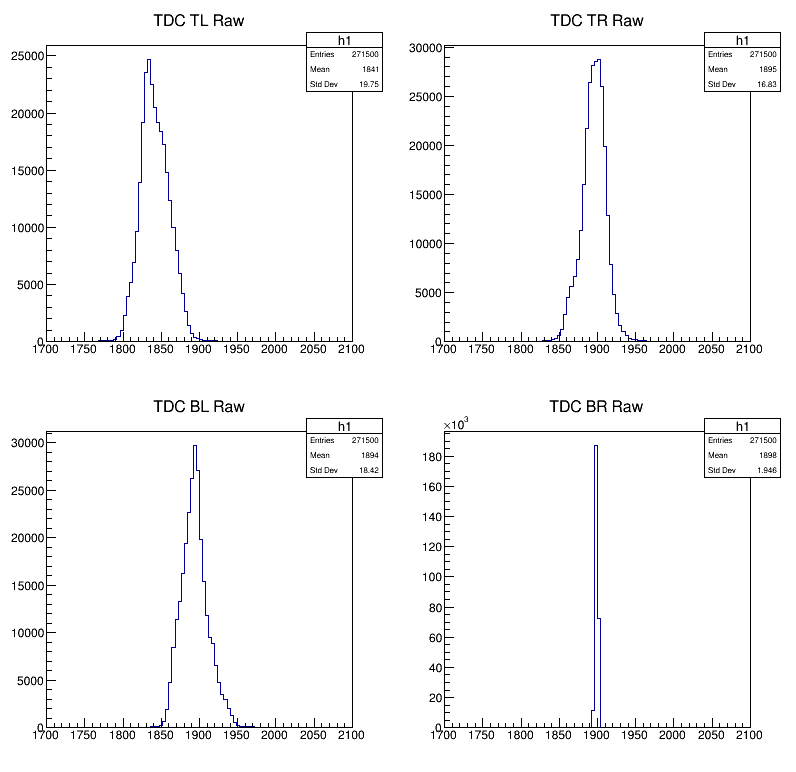

In [8]:
# Canvas 1
htdctl = fdftt.Histo1D(("h1", "TDC TL Raw", 100, 1700.0, 2100.0),'tdctl')
htdctr = fdftt.Histo1D(("h1", "TDC TR Raw", 100, 1700.0, 2100.0),'tdctr')
htdcbl = fdftt.Histo1D(("h1", "TDC BL Raw", 100, 1700.0, 2100.0),'tdcbl')
htdcbr = fdftt.Histo1D(("h1", "TDC BR Raw", 100, 1700.0, 2100.0),'tdcbr')

c1 = root.TCanvas("c1","c1",800,800)
c1.Divide(2,2,0.01,0.01,0)

c1.cd(1)
htdctl.Draw()
c1.cd(2)
htdctr.Draw()
c1.cd(3)
htdcbl.Draw()
c1.cd(4)
htdcbr.Draw()

c1.Draw()

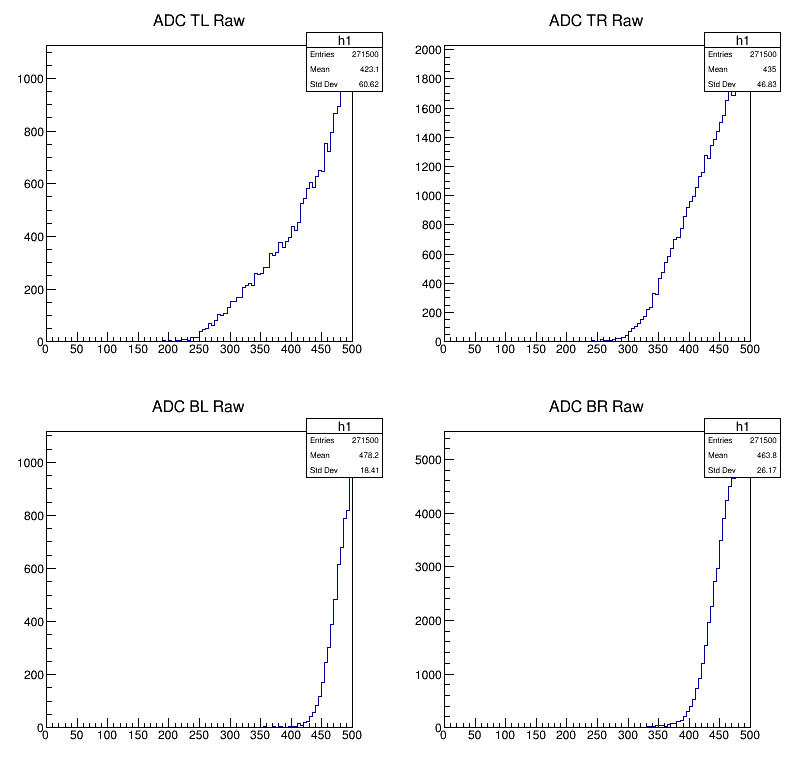

In [9]:
# Canvas 3
hadctl = fdftt.Histo1D(("h1", "ADC TL Raw", 100, 0.0, 500.0),'adctl')
hadctr = fdftt.Histo1D(("h1", "ADC TR Raw", 100, 0.0, 500.0),'adctr')
hadcbl = fdftt.Histo1D(("h1", "ADC BL Raw", 100, 0.0, 500.0),'adcbl')
hadcbr = fdftt.Histo1D(("h1", "ADC BR Raw", 100, 0.0, 500.0),'adcbr')

c3 = root.TCanvas("c3","c3",800,800)
c3.Divide(2,2,0.01,0.01,0)

c3.cd(1)
hadctl.Draw()
c3.cd(2)
hadctr.Draw()
c3.cd(3)
hadcbl.Draw()
c3.cd(4)
hadcbr.Draw()

c3.Draw()

In [10]:
def read_peds(filename):
    values = []
    with open(filename, 'r') as file:
        for line in file:
            try:
                value = float(line.strip())
                values.append(value)
            except ValueError:
                pass  # Skip lines that can't be converted to floats
    return values

ped = read_peds("./pedestalfiles/pedestalrun172.dat")

pedtl=ped[0]
pedtr=ped[1]
pedbl=ped[2]
pedbr=ped[3]

import ROOT

@ROOT.Numba.Declare([], 'float')
def ftdctr0():
    return tdctr0

@ROOT.Numba.Declare([], 'float')
def ftdctl0():
    return tdctl0

@ROOT.Numba.Declare([], 'float')
def ftdcbr0():
    return tdcbr0

@ROOT.Numba.Declare([], 'float')
def ftdcbl0():
    return tdcbl0

@ROOT.Numba.Declare([], 'float')
def fadctr0():
    return adctr0

@ROOT.Numba.Declare([], 'float')
def fadctl0():
    return adctl0

@ROOT.Numba.Declare([], 'float')
def fadcbr0():
    return adcbr0

@ROOT.Numba.Declare([], 'float')
def fadcbl0():
    return adcbl0

@ROOT.Numba.Declare([], 'float')
def fpedtr():
    return pedtr

@ROOT.Numba.Declare([], 'float')
def fpedtl():
    return pedtl

@ROOT.Numba.Declare([], 'float')
def fpedbr():
    return pedbr

@ROOT.Numba.Declare([], 'float')
def fpedbl():
    return pedbl

@ROOT.Numba.Declare([], 'float')
def fadjadcto():
    return adjadcto

#root.gInterpreter.Declare('float tdctl0 = float(TPython::Exec("tdctl0"));')
#root.gInterpreter.Declare('float tdctr0 = float(TPython::Exec("tdctr0"));')
#root.gInterpreter.Declare('float tdcbl0 = float(TPython::Exec("tdcbl0"));')
#root.gInterpreter.Declare('float tdcbr0 = float(TPython::Exec("tdcbr0"));')
#root.gInterpreter.Declare('float adctl0 = float(TPython::Exec("adctl0"));')
#root.gInterpreter.Declare('float adctr0 = float(TPython::Exec("adctr0"));')
#root.gInterpreter.Declare('float adcbl0 = float(TPython::Exec("adcbl0"));')
#root.gInterpreter.Declare('float adcbr0 = float(TPython::Exec("adcbr0"));')
#root.gInterpreter.Declare('float pedtl = float(TPython::Exec("pedtl"));')
#root.gInterpreter.Declare('float pedtr = float(TPython::Exec("pedtr"));')
#root.gInterpreter.Declare('float pedbl = float(TPython::Exec("pedbl"));')
#root.gInterpreter.Declare('float pedbr = float(TPython::Exec("pedbr"));')

#root.gInterpreter.Declare('float adjadcto = float(TPython::Exec("adjadcto"));')

fdfttt = fdftt.Define("tdctladj", "tdc[0]-Numba::ftdctl0()+2000;") \
              .Define("tdctradj", "tdc[1]-Numba::ftdctr0()+2000;") \
              .Define("tdcbladj", "tdc[2]-Numba::ftdcbl0()+2000;") \
              .Define("tdcbradj", "tdc[3]-Numba::ftdcbr0()+2000;") \
              .Define("adctladj", "(adc[0]-Numba::fpedtl())*Numba::fadjadcto()/(Numba::fadctl0()-Numba::fpedtl());") \
              .Define("adctradj", "(adc[1]-Numba::fpedtr())*Numba::fadjadcto()/(Numba::fadctr0()-Numba::fpedtr());") \
              .Define("adcbladj", "(adc[2]-Numba::fpedbl())*Numba::fadjadcto()/(Numba::fadcbl0()-Numba::fpedbl());") \
              .Define("adcbradj", "(adc[3]-Numba::fpedbr())*Numba::fadjadcto()/(Numba::fadcbr0()-Numba::fpedbr());")

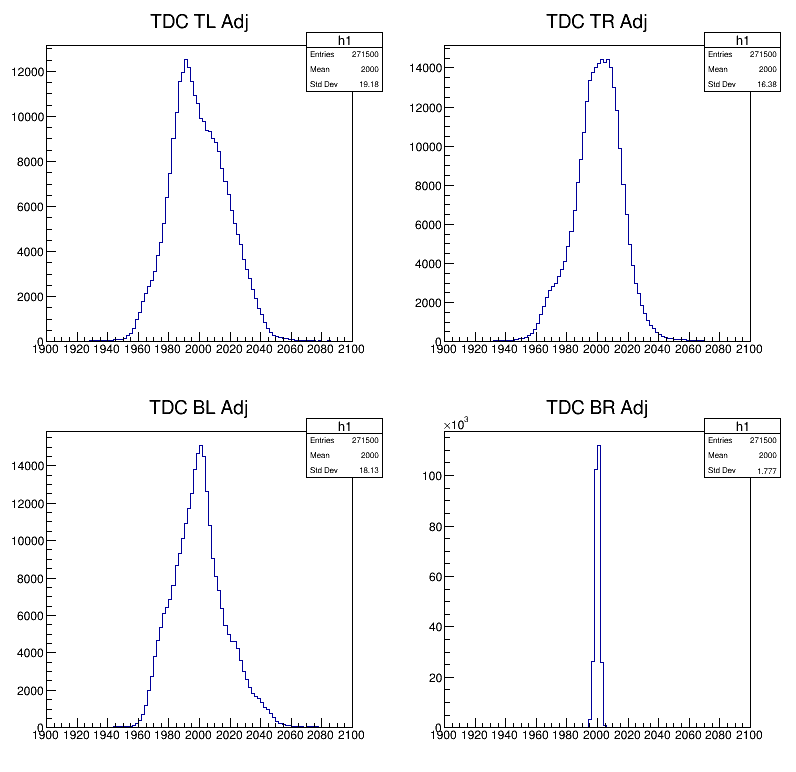

In [11]:
# Canvas 2
htdctladj = fdfttt.Histo1D(("h1", "TDC TL Adj", 100, 1900.0, 2100.0),'tdctladj')
htdctradj = fdfttt.Histo1D(("h1", "TDC TR Adj", 100, 1900.0, 2100.0),'tdctradj')
htdcbladj = fdfttt.Histo1D(("h1", "TDC BL Adj", 100, 1900.0, 2100.0),'tdcbladj')
htdcbradj = fdfttt.Histo1D(("h1", "TDC BR Adj", 100, 1900.0, 2100.0),'tdcbradj')

c2 = root.TCanvas("c2","c2",800,800)
c2.Divide(2,2,0.01,0.01,0)

c2.cd(1)
htdctladj.Draw()
c2.cd(2)
htdctradj.Draw()
c2.cd(3)
htdcbladj.Draw()
c2.cd(4)
htdcbradj.Draw()

c2.Draw()

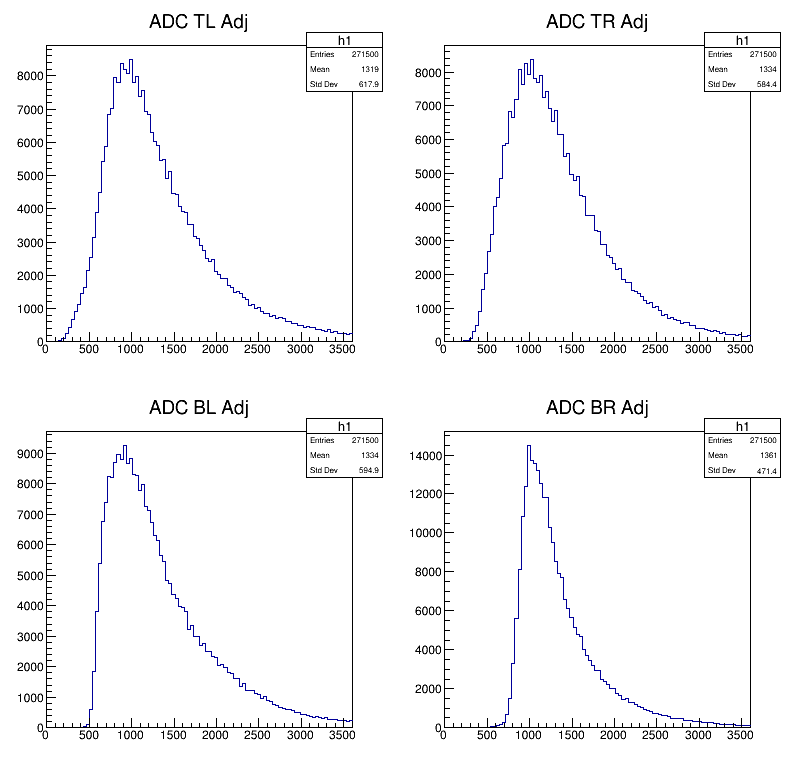

In [12]:
# Canvas 4
hadctladj = fdfttt.Histo1D(("h1", "ADC TL Adj", 100, 0.0, 3600.0),'adctladj')
hadctradj = fdfttt.Histo1D(("h1", "ADC TR Adj", 100, 0.0, 3600.0),'adctradj')
hadcbladj = fdfttt.Histo1D(("h1", "ADC BL Adj", 100, 0.0, 3600.0),'adcbladj')
hadcbradj = fdfttt.Histo1D(("h1", "ADC BR Adj", 100, 0.0, 3600.0),'adcbradj')

c4 = root.TCanvas("c4","c4",800,800)
c4.Divide(2,2,0.01,0.01,0)

c4.cd(1)
hadctladj.Draw()
c4.cd(2)
hadctradj.Draw()
c4.cd(3)
hadcbladj.Draw()
c4.cd(4)
hadcbradj.Draw()

c4.Draw()

In [13]:
fdftttt = fdfttt.Define("xtop","getXTop(trigger,tdctladj,tdctradj,tdcbladj,tdcbradj)") \
            .Define("xbottom","getXBottom(trigger,tdctladj,tdctradj,tdcbladj,tdcbradj)") \
            .Define("xmeantop","getXMeanTop(trigger,tdctladj,tdctradj,tdcbladj,tdcbradj)") \
            .Define("xmeanbottom","getXMeanBottom(trigger,tdctladj,tdctradj,tdcbladj,tdcbradj)") \
            .Define("xmean","getXMean(trigger,xmeantop,xmeanbottom)") \
            .Define("theta","getTheta(trigger,xtop,xbottom)") \
            .Define("theta2","getTheta2(trigger,xtop,xbottom)") \
            .Define("etop","getETop(trigger,adctladj,adctradj)") \
            .Define("ebottom","getEBottom(trigger,adcbladj,adcbradj)") \
            .Define("eratio","getERatio(trigger,etop,ebottom)")

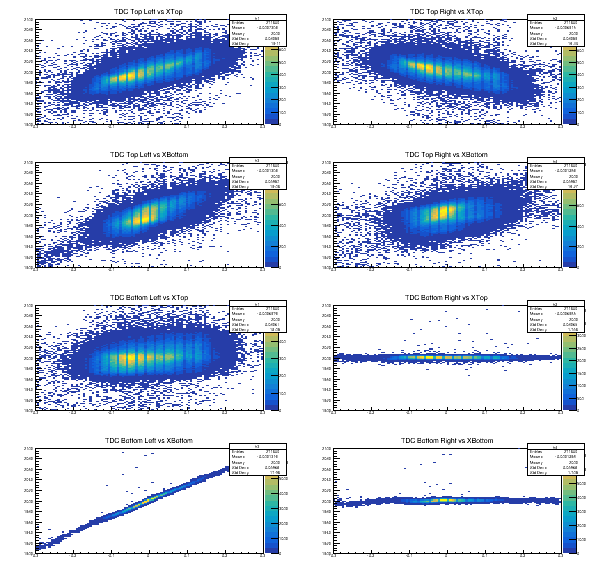

In [14]:
bin = 100

c6 = root.TCanvas("c6", "c6", 112,112,600,600);
c6.Divide(2,4, 0.01, 0.01, 0);

hTDCTLvsXT = fdftttt.Histo2D(("h1","TDC Top Left vs XTop",bin,-0.3,0.3,bin,1900,2100),"xtop","tdctladj");
hTDCTRvsXT = fdftttt.Histo2D(("h2","TDC Top Right vs XTop",bin,-0.3,0.3,bin,1900,2100),"xtop","tdctradj");
hTDCTLvsXB = fdftttt.Histo2D(("h3","TDC Top Left vs XBottom",bin,-0.3,0.3,bin,1900,2100),"xbottom","tdctladj");
hTDCTRvsXB = fdftttt.Histo2D(("h4","TDC Top Right vs XBottom",bin,-0.3,0.3,bin,1900,2100),"xbottom","tdctradj");
hTDCBLvsXT = fdftttt.Histo2D(("h1","TDC Bottom Left vs XTop",bin,-0.3,0.3,bin,1900,2100),"xtop","tdcbladj");
hTDCBRvsXT = fdftttt.Histo2D(("h2","TDC Bottom Right vs XTop",bin,-0.3,0.3,bin,1900,2100),"xtop","tdcbradj");
hTDCBLvsXB = fdftttt.Histo2D(("h3","TDC Bottom Left vs XBottom",bin,-0.3,0.3,bin,1900,2100),"xbottom","tdcbladj");
hTDCBRvsXB = fdftttt.Histo2D(("h4","TDC Bottom Right vs XBottom",bin,-0.3,0.3,bin,1900,2100),"xbottom","tdcbradj");

c6.cd(1);
hTDCTLvsXT.Draw("COLZ");
c6.cd(2);
hTDCTRvsXT.Draw("COLZ");
c6.cd(3);
hTDCTLvsXB.Draw("COLZ");
c6.cd(4);
hTDCTRvsXB.Draw("COLZ");
c6.cd(5);
hTDCBLvsXT.Draw("COLZ");
c6.cd(6);
hTDCBRvsXT.Draw("COLZ");
c6.cd(7);
hTDCBLvsXB.Draw("COLZ");
c6.cd(8);
hTDCBRvsXB.Draw("COLZ");

c6.Draw();

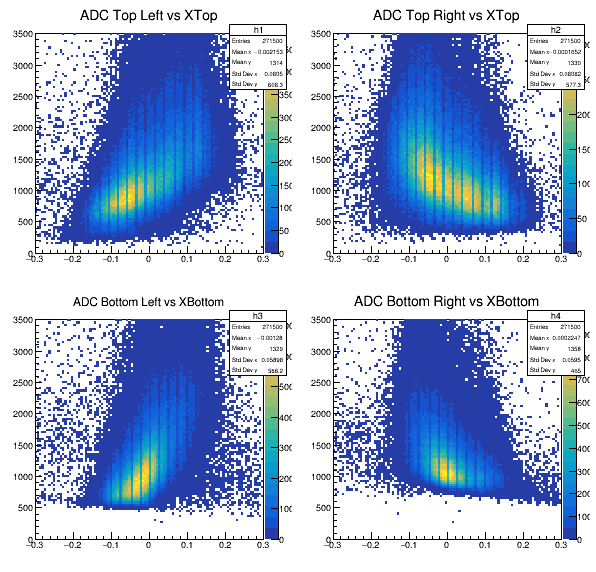

In [15]:
c5 = root.TCanvas("c5", "c5", 125,125,600,600);
c5.Divide(2,2, 0.01, 0.01, 0);

hADCvsXTL = fdftttt.Histo2D(("h1","ADC Top Left vs XTop",bin,-0.3,0.3,bin,0,3500),"xtop","adctladj");
hADCvsXTR = fdftttt.Histo2D(("h2","ADC Top Right vs XTop",bin,-0.3,0.3,bin,0,3500),"xtop","adctradj");
hADCvsXBL = fdftttt.Histo2D(("h3","ADC Bottom Left vs XBottom",bin,-0.3,0.3,bin,0,3500),"xbottom","adcbladj");
hADCvsXBR = fdftttt.Histo2D(("h4","ADC Bottom Right vs XBottom",bin,-0.3,0.3,bin,0,3500),"xbottom","adcbradj");

c5.cd(1);
hADCvsXTL.Draw("COLZ");
c5.cd(2);
hADCvsXTR.Draw("COLZ");
c5.cd(3);
hADCvsXBL.Draw("COLZ");
c5.cd(4);
hADCvsXBR.Draw("COLZ");

c5.Draw();


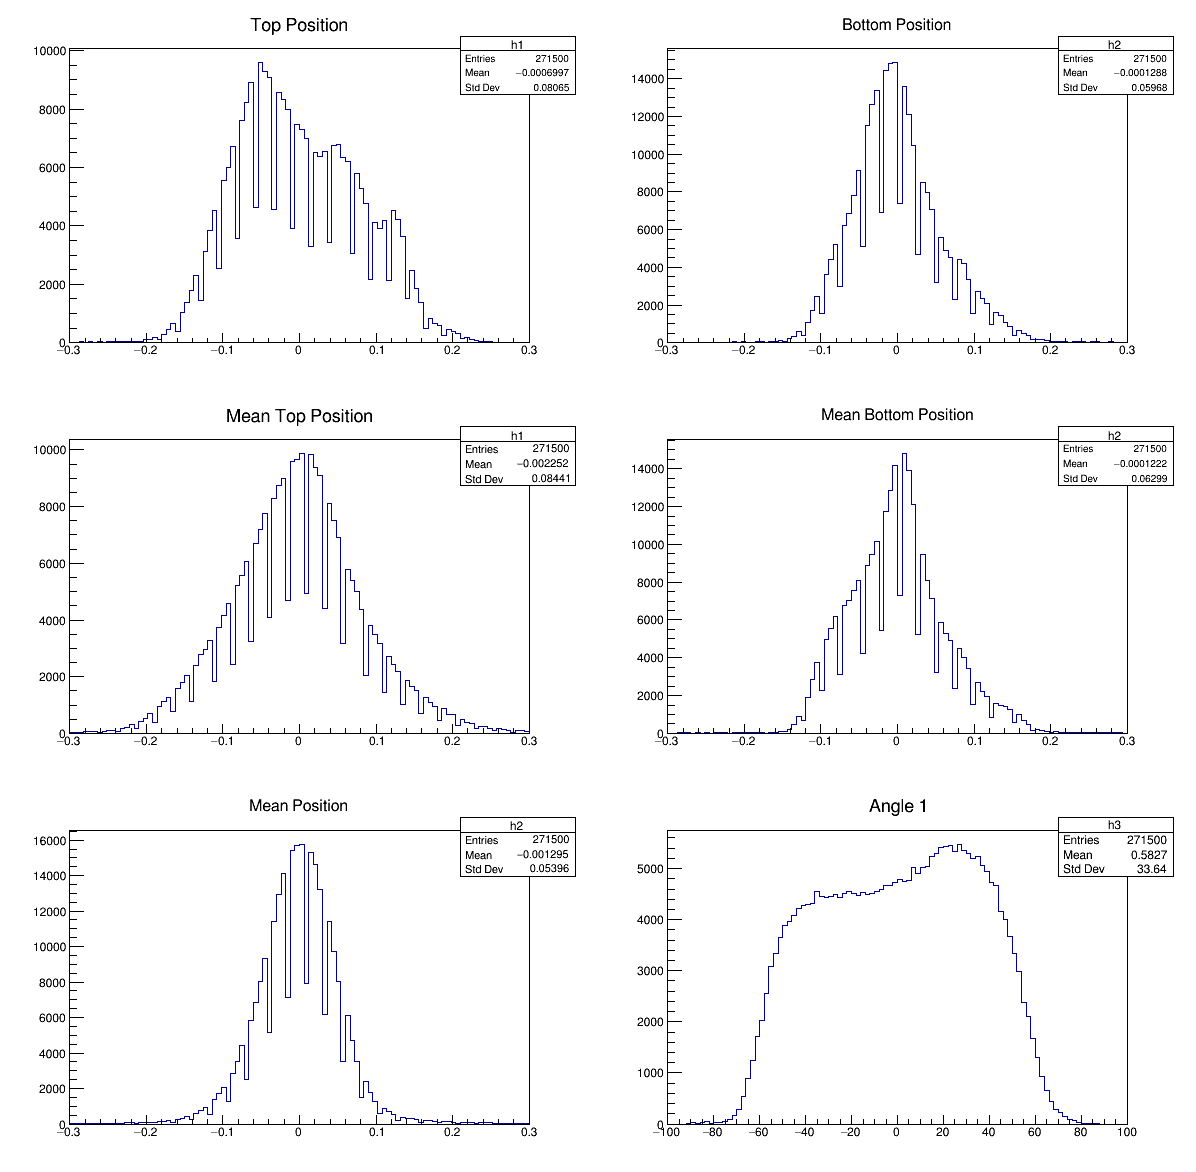

In [16]:
c7 = root.TCanvas("c7", "c7", 350,350,1200,1200);
c7.Divide(2,3, 0.01, 0.01, 0);

hXTop = fdftttt.Histo1D(("h1","Top Position",bin,-0.3,0.3),"xtop");
hXBottom = fdftttt.Histo1D(("h2","Bottom Position",bin,-0.3,0.3),"xbottom");
hXMeanTop = fdftttt.Histo1D(("h1","Mean Top Position",bin,-0.3,0.3),"xmeantop");
hXMeanBottom = fdftttt.Histo1D(("h2","Mean Bottom Position",bin,-0.3,0.3),"xmeanbottom");
hXMean = fdftttt.Histo1D(("h2","Mean Position",bin,-0.3,0.3),"xmean");
hTheta = fdftttt.Histo1D(("h3","Angle 1",bin,-100,100),"theta");
#hTheta2 = fdftttt.Histo1D(("h4","Angle 2",bin,-100,100),"theta2");

c7.cd(1);
hXTop.Draw();
c7.cd(2);
hXBottom.Draw();
c7.cd(3);
hXMeanTop.Draw();
c7.cd(4);
hXMeanBottom.Draw();
c7.cd(5);
hXMean.Draw();
c7.cd(6);
hTheta.Draw();
#hTheta2.SetFillColor(kRed);
#hTheta2.Draw("SAME");

c7.Draw();

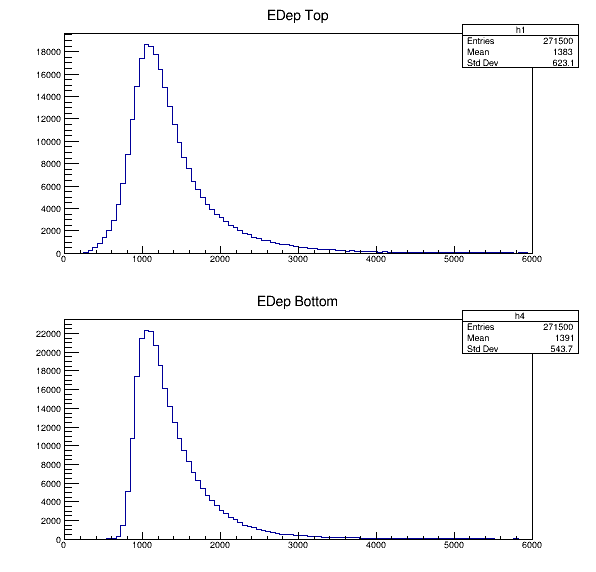

In [17]:
c8 = root.TCanvas("c8", "c8", 200,200,600,600);
c8.Divide(1,2, 0.01, 0.01, 0);

hADCT = fdftttt.Histo1D(("h1","EDep Top",bin,0,6000),"etop");
hADCB = fdftttt.Histo1D(("h4","EDep Bottom",bin,0,6000),"ebottom");

c8.cd(1);
hADCT.Draw();
c8.cd(2);
hADCB.Draw();

c8.Draw();

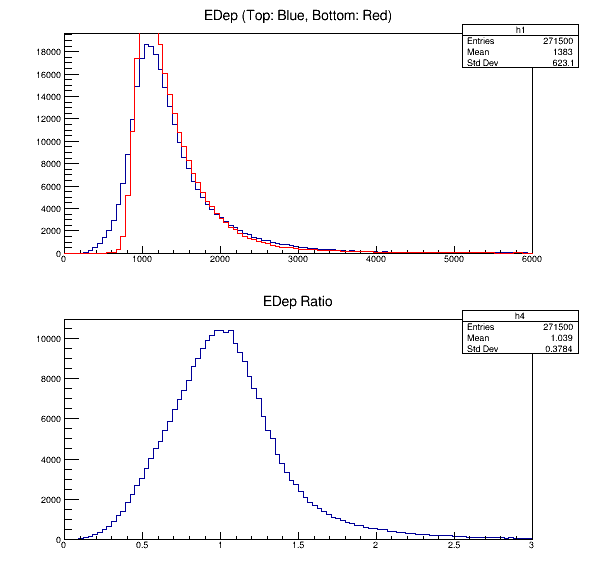

In [18]:
c9 = root.TCanvas("c9", "c9", 225,225,600,600);
c9.Divide(1,2, 0.01, 0.01, 0);

hADCT = fdftttt.Histo1D(("h1","EDep (Top: Blue, Bottom: Red)",bin,0,6000),"etop");
hADCB = fdftttt.Histo1D(("h4","EDep Bottom",bin,0,6000),"ebottom");
hADCR = fdftttt.Histo1D(("h4","EDep Ratio",bin,0,3.0),"eratio");

c9.cd(1);
hADCT.Draw();
hADCB.SetLineColor(ROOT.kRed);
hADCB.Draw("SAME");
c9.cd(2);
hADCR.Draw();

c9.Draw();


Warning in <ROOT::Math::FitConfig::CreateMinimizer>: Could not create the Minuit2 minimizer. Try using the minimizer Minuit
Warning in <ROOT::Math::FitConfig::CreateMinimizer>: Could not create the Minuit2 minimizer. Try using the minimizer Minuit


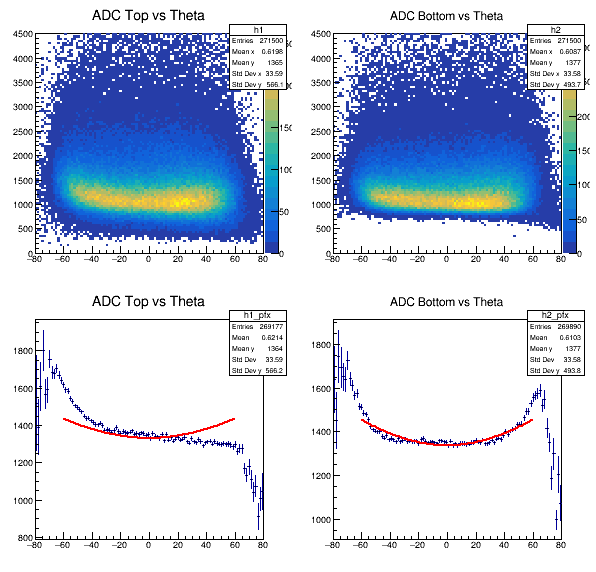

In [19]:
c10 = root.TCanvas("c10", "c10", 250,250,600,600);
c10.Divide(2,2, 0.01, 0.01, 0);

hADCTopvsTheta = fdftttt.Histo2D(("h1","ADC Top vs Theta",bin,-80,80,bin,0,4500),"theta","etop");
hADCBottomvsTheta = fdftttt.Histo2D(("h2","ADC Bottom vs Theta",bin,-80,80,bin,0,4500),"theta","ebottom");

c10.cd(1);
hADCTopvsTheta.Draw("COLZ");
c10.cd(2);
hADCBottomvsTheta.Draw("COLZ");

c10.cd(3);
myLeBronFit = ROOT.TF1("myLeBronFit","[0]*(1.0+[1]*cos(x*3.14159/180.0))",-60.0,60.0);
prof = hADCTopvsTheta.ProfileX();
prof.Fit("myLeBronFit","QR");
prof.Draw();

c10.cd(4);
prof2 = hADCBottomvsTheta.ProfileX();
prof2.Fit("myLeBronFit","QR");
prof2.Draw();

c10.Draw();


In [20]:
t.stop()

Elapsed time: 128.5383 seconds
